Work in progress... 9/21/22

# Start Up

Corona Virus has taken the world by storm, companies had to close due to bankruptcy and many employess lost their job.
Now that the situation are getting better, Start Up Company is looking to improve their operations after the global pandemic.


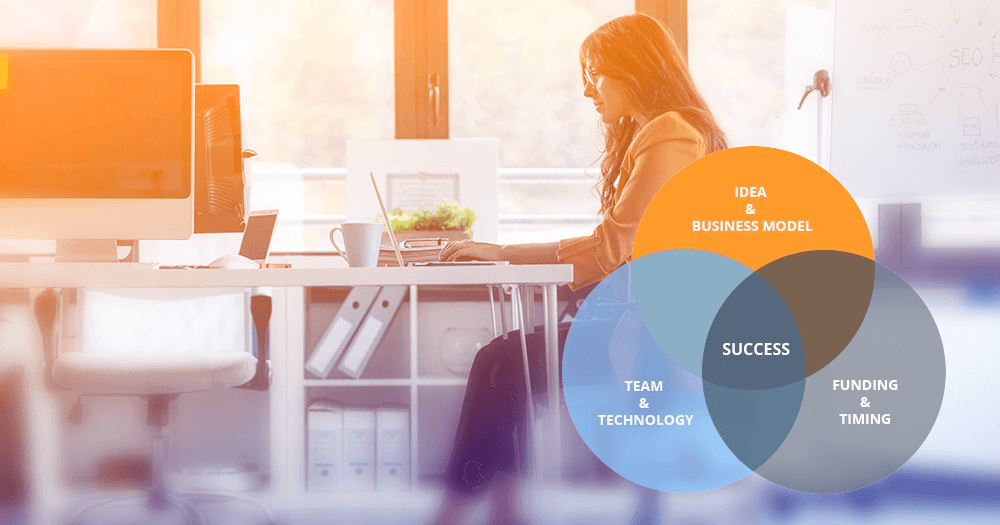

Data Source:
1. [Financial Data](https://drive.google.com/file/d/1uNg6oneSKClkcmdFS7EZ8Uk8GQU4yuKW/view?usp=sharing)
2. [Employees](https://drive.google.com/file/d/17XvCQk5Kau31AEYkXka6xWVQBbAwD-2_/view?usp=sharing)
3. [Expenses](https://drive.google.com/file/d/1AoddChQHXExhHPVvSsGeq_EXhHI7n6zx/view?usp=sharing)


In this project, We will help answer important questions such as:
- Is the company in good financial health?
- Does the company need to let go of any employees?
- Should the company allow employees to work from home permanently?

***

Loading necessary python libraries and datsets.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

In [ ]:
df1 = pd.read_csv('finacial_data.csv')
df2 = pd.read_csv('expenses.csv')
df3 = pd.read_csv('employees.csv')

# Revenue and Expenses
Data analysis on the past six months of the START UP company’s financial data.

In [ ]:
print(df1.shape)
df1.head(2)

In [ ]:
# hide/show code
plt.figure(figsize=(8, 4)) 
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun"]
x_values = range(len(months))

ax1 = plt.subplot()
plt.xlabel('Months')
plt.ylabel('Cost')

plt.title('Revenue vs. Expenses')
x_values = range(len(months))
ax1.set_xticks(x_values)
ax1.set_xticklabels(months, rotation=30)
plt.plot(x_values, df1.Revenue, marker= 'o', label='Revenue')
plt.plot(x_values, df1.Expenses, marker= 'o', label='Expenses')

plt.legend()

As shown, revenue seems to be quickly decreasing while expenses are increasing. If the current trend continues, expenses will soon surpass revenues, putting the company at risk. At this rate we should cut our expenses cost.

# Expenses Proportion
Company expenses over the six months.

In [ ]:
print(df2.shape)
df2.head(7)

In [ ]:
colors = sns.color_palette('pastel')[0:5]
explode = [0.1, 0.02, 0.02, 0.25, 0.25, 0.25, 0.25]

plt.pie(df2.Proportion, 
        labels = df2.Expense,
        autopct='%.0f%%',
        colors=colors,
        explode=explode
       )


plt.title('Expense Categories')
plt.axis('Equal')
plt.tight_layout()

It seems that Salaries, Advertising, and Office Rent make up most of the expenses, while the rest of the categories make up a small percentage. Salaries make up a majority of the expenses, so this is the category that the START UP company should focus on in order to cut costs in a meaningful way.

# Employee Productivity
Salaries make up 62% of expenses. To cut expenses costs in a meaningful way, we must let go of some employees. ;(

Each employee is assigned a productivity score based on their work. We would like to keep the most highly productive employees and let go of the least productive employees.

In [ ]:
print(df3.shape)
df3.head(3)

Employee's record sorted by productivity score.

In [ ]:
df3_sorted = df3.sort_values(by=['Productivity'])
df3_sorted.head(3)

In [ ]:
plt.figure(figsize=(8, 4)) 
# bins represent total employee, set bin to 300 for better analysis
sns.histplot(x = df3_sorted.Productivity, bins=300) 

Distribution of Empoyee's Productivity scores indicates that our data is very consistent. The count frequency on each productivity score is very similar to each others.

### Categorized Productivity

Now we can divide our productivity score into four levels:

1. very_low (<=25)
2. low (26-50)
3. medium (51-75)
4. high (>=76)

In [ ]:
bins = [0, 25, 50, 75, 100]
bins_name = ['very_low (<=25)', 'low (26-50)', 'medium (51-75)', 'high (>=76)']

df3['binned_productivity'] = pd.cut(df3['Productivity'], bins, labels = bins_name)

# make sure that each category are in order.
df3['binned_productivity'].unique()

### Visualized
We classify our productivity scores by four levels.

In [ ]:
plt.figure(figsize = (8,4))
ax = sns.countplot(x = 'binned_productivity', data = df3)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 0)
plt.title('Employees Productivty')

for i in ax.containers:
    ax.bar_label(i,)

plt.show()

We now see employees with the lowest productivity scores. We can conlude to drop employees that under very low category.

# Let's go deeper...

Let's perform some bivariate analysis(analysis of two variables) for the purpose of determining the relationship between two variables.

### Salary and Productivity
Is there any relation to being productive and a high salary?

In [ ]:
# hide/show code
# correlation 1 or -1 mean strong relation while nearly zero means weak or no correlation
corr, p = pearsonr(df3['Productivity'], df3['Salary'])
print(corr, p)

plt.figure(figsize = (5,3))
# plt.scatter(df3['Productivity'], df3['Salary'], alpha = 0.5)

sns.regplot(x= 'Productivity', y= 'Salary', data= df3, 
           scatter_kws={'alpha':0.5})
plt.title('Productivity vs Salary')
plt.xlabel('Productivity')
plt.ylabel('Salary')
plt.show()

There's no correalation between productivity and salary (pearson score is 0.06, nearly zero), thus salary are based on other factors.

`Interpretation:`
1. P val is at 0.29 which not enough to reject the null hypothesis. Meaning that shorter or longer Commute Time has no significant differences in terms of employee's Productivity.
2. There are less productive employee but paid really high.
3. Some productive employees don't seems paid well enough.


### Commute Time and Productivity
Is lower Commute Time can result to being more productive?

In [ ]:
# hide/show code
corr, p = pearsonr(df3['Commute Time'], df3['Productivity'])
print(corr, p)

plt.figure(figsize = (5,3))
# plt.scatter(df3['Commute Time'], df3['Productivity'], alpha = 0.5)

sns.regplot(x = df3['Commute Time'], y = df3['Productivity'],
           scatter_kws={'alpha':0.4})
plt.title('Commute Time vs. Productivity')
plt.xlabel('Commute time')
plt.ylabel('Productivity')
plt.show()

Pearson score is -0.06 with pval of 0.29 which is not enough to conclude for significant relation, thus Commute Time and Productivity has no correlation.

- It seems that having a shorter or longer commute time does'nt produce productivity based on this particular employees bahavior.
- P val is at 0.29 which not enough to reject the null hypothesis. Meaning that shorter or longer Commute time(Does'nt affect productivity) has no significant differences in terms of employee's Productivity.
- Can we improve Productivity if we implement work from home set-up? or how about hybrid set-up?(ofcourse this will depends on the job nature)


### Exploring Commute Time
Univirate analysis

#### Check for skewness
First, lets check the commute times distribution skewnes level

In [ ]:
df3['Commute Time'].skew()

Generally, if skewness is less than -1 or greater than 1, the distribution is highly skewed.

#### Summary Statistic for Commute Time
Let’s do some quick analysis on the commute times of employees

In [ ]:
df3['Commute Time'].describe()

#### Visualization
Let’s explore the shape of the commute time data using a histogram.

In [ ]:
# Visualize
sns.histplot(df3['Commute Time'])
plt.axvline(np.mean(df3['Commute Time']), linestyle='--', color='red', label='Mean')
plt.axvline(np.median(df3['Commute Time']), linestyle='--', color='yellow', label='Median')

plt.legend()
plt.show()

We have an average of 33.44 mins commute time, however median is more likely a good measure of central tendency for skew distribution. Our median value is 31.06 mins. 

### Log Transformation
The data seems to be skewed to the right. To make it more symmetrical, we might try applying a log transformation.

In [ ]:
# convert to log
commute_times_log = np.log(df3['Commute Time'])
# Convert to dataframe
commute_times_log = pd.DataFrame(commute_times_log)

In [ ]:
sns.histplot(commute_times_log)
plt.axvline(np.mean(commute_times_log['Commute Time']),
            linestyle='--',
            color='red',
            label='Mean: ' + str(np.mean(commute_times_log['Commute Time'])))
plt.legend()
plt.show()

### Anti log
Our result `mean` is in logarithm form, we need to revert it back to it's normal numerical form.

In [ ]:
np.exp(np.mean(commute_times_log['Commute Time']))

With applying the log transformation we got an average of 29.80 mins commute time. We can conclude that the average Commute Time of employees is in between 29 to 34 minutes.

# Clustering
Now we will categorized our employees based on their Productivy and Salary.

In [ ]:
# import sklean library
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
# import warnings

# warnings.filterwarnings('ignore')

In [ ]:
# subset of our dataset
dfx = df3[['Productivity', 'Salary']]

# Normalise our data set
scaler = StandardScaler()
df = scaler.fit_transform(dfx)

 ### Finding the best `k` value 
 A good model is one with low inertia and a low number of clusters (K)

In [ ]:
# hide/show code
clusters = []
inertias = []

# Checking what is the best 'k' value
# try for 9 
for k in range(1,10):
  km = KMeans(n_clusters=k, random_state=0)
  km.fit(df)
  
  # append clusters and inertias
  inertias.append(km.inertia_)
  clusters.append(km)
  
plt.plot(range(len(inertias)), inertias, '-o')
plt.xlabel('number of clusters (k)')
plt.ylabel('inertia')

### Check for silhoutte score

In [ ]:
for i in range(1,9,1): 
    print("---------------------------------------")
    print(clusters[i])
    print("Silhouette score:",silhouette_score(df, clusters[i].predict(df)))

4 clusters seem pretty good. Let's apply clusstering using k=4.

### Kmeans with 4 clusters

In [ ]:
km = KMeans(n_clusters=4, random_state=0)

# fit and predict labels
y_km = km.fit_predict(df)
y_km

In [ ]:
km.predict([[-0.7184224564401979, -0.899120462485942]])

### Setting up centroids
Center points of each clusters.

In [ ]:
centers = km.cluster_centers_
centers

In [ ]:
centers[2][0], centers[2][1]

### Matrix first 5 records

In [ ]:
df[0:5]

### Assigning variables

Assigning the 'productivity' variable to the first column vector of the matrix(df) and a 'salary' variable to second column vector. 

In [ ]:
productivity = df[:,0]
salary = df[:,1]

# first 5 records
print(productivity[0:5])
print(salary[0:5])

### Visualized

In [ ]:
plt.rcParams['axes.facecolor'] = 'white'

plt.figure(figsize=(8,5))
plt.scatter(productivity, salary, c=y_km, alpha=0.5)

plt.scatter(centers[0][0], centers[0][1], marker='*', color ='purple', s=300, label ='purple centroid (0)', edgecolor = 'black')
plt.scatter(centers[1][0], centers[1][1], marker='*', color ='blue', s=300, label ='blue centroid (1)', edgecolor = 'black')
plt.scatter(centers[2][0], centers[2][1], marker='*', color ='green', s=300, label ='green centroid (2)', edgecolor = 'black')
plt.scatter(centers[3][0], centers[3][1], marker='*', color ='yellow', s=300, label ='yellow centroid (3)', edgecolor = 'black')

plt.xlabel('Productivy')
plt.ylabel('Salary')
plt.legend()

`Assigning category names:`
1. `purple(0)` = high productivy with low salary employees
2. `blue(1)`   = low productivty with high salary employees
3. `green(2)`  = low productivty with low salary employees
4. `yellow(3)` = high productivy with high salary employees

### Concatenate df3 and the predicted clusters (y_km)

In [ ]:
# turn our predicted value first into dataframe
emp_classification = pd.DataFrame(y_km)

# concatenate, assign it to a new variable
df3_new = pd.concat([df3, emp_classification], axis=1, join='inner')

# rename column
df3_new = df3_new.rename(columns={0: 'Color_classification'})
df3_new.head(3)

### Map these clusters into assign colors 

In [ ]:
codes = {0:'purple',
        1:'blue',
        2:'green',
        3: 'yellow'}

df3_new['Color_classification'] =  df3_new['Color_classification'].map(codes)
df3_new.head(3)

In [ ]:
df3_new['Color_classification'].value_counts()

In [ ]:
# hide/show code
ax = sns.countplot(df3_new['Color_classification'], palette = ['green', 'yellow', 'blue', 'purple'], alpha = 0.7)
for i in ax.containers:
    ax.bar_label(i,)

We are likely to drop employees that falls under blue category. These employees has the highest paying salaries yet low in productivity then our second option is from green category. Employees under purple are the one to keep.

### Determining employees

Show employees under blue category

In [ ]:
blue_emp = df3_new[df3_new['Color_classification'] == 'blue']
print(len(blue_emp))
blue_emp.head(3)

Further filtering, showing blue_emp with very low productiviy

In [ ]:
drop_emp = blue_emp[blue_emp['binned_productivity'] == 'very_low (<=25)']
print(len(drop_emp))
drop_emp.head(3)

Showing top 5 records, sorted by highest paying employees and has very low productivy. 

In [ ]:
drop_emp = drop_emp.sort_values(by=['Salary'], ascending=False)
drop_emp.head(5)

These employees are the most considerable to drop. However droping employees is not that easy to say and done.
I'ts needs further discussion and considerations.  

# Conclusion

1. Revenue seems to be quickly decreasing while expenses are increasing. If the current trend continues, expenses will soon surpass revenues, putting the company at risk.
2. We can't cut advertisement expenses since this is one source of revenues. START UP company should consider droping employees and another to consider is the office rent if we could only work out to lower it's cost. 
3. Work from home or hybrid set-up should be consider and after a month or two make an analysis if the performance will improve. Also this will help the company save expenses like the electric bill cost (aircons, computers, tissue, water etc.)